In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#import data
P_df = pd.read_csv('../data_secgrp/P_df.csv')
P_df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_cit,can_sta,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,cov_sta_dat,cov_end_dat,winner,votes,campaign_duration
0,P20000089,"FELLURE, LOWELL JACKSON",P,US,0.0,REP,CHALLENGER,682 ORCHARD PARK ROAD,HURRICANE,WV,...,$590.00,$590.00,NaN,NaN,"$3,762.00",2015-01-01,2015-09-30,N,NaN,272
1,P60006202,"JONES, DANNY ROYCE MR. SR.",P,US,0.0,REP,CHALLENGER,609 SW 1ST STREET,KERENS,TX,...,NaN,NaN,NaN,NaN,NaN,2015-01-01,2015-06-30,N,NaN,180
2,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",P,US,0.0,REP,OPEN,725 FIFTH AVENUE,NEW YORK,NY,...,NaN,"$15,994,453.57",468441900.0,"$923,650,997.64","$2,086,572.41",2015-04-02,2016-10-19,Y,NaN,566
3,P60005154,"CLARK, BRITTANY",P,US,0.0,PPY,OPEN,"28200 HIGHWAY 189, SUITE F-240-20",LAKE ARROWHEAD,CA,...,NaN,"$6,453.00",NaN,NaN,"$19,586.00",2016-01-31,2017-01-31,N,NaN,366
4,P60016383,"KITTINGTON, VALMA",P,US,0.0,REP,OPEN,79 RANDOLPH STREET,MIDLAND CITY,AL,...,NaN,NaN,NaN,NaN,NaN,2015-07-15,2016-12-31,N,NaN,535


In [4]:
P_df.shape

(158, 42)

In [5]:
#create dataframe grouped by total amount spent
Amt_per_sta_ds = P_df.groupby(['can_nam', 'winner', 'can_par_aff', 'campaign_duration'])['net_con'].sum().to_frame(name = "total_dis_sum")

In [6]:
#sort result
Amt_per_sta_ds = Amt_per_sta_ds.sort_values(by = ['total_dis_sum'], ascending=False).reset_index()

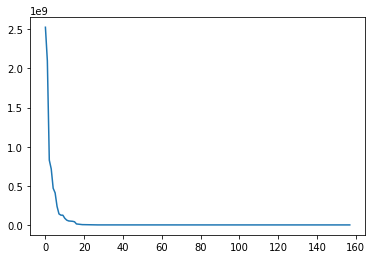

In [7]:
#create visualization to reach an assumption on which section of the data points could be candidates to win the election
Amt_per_sta_ds['total_dis_sum'].plot()

In [8]:
# select first 20 data points as candidates
Amt_per_sta_ds = Amt_per_sta_ds.iloc[:20, :]

In [9]:
Amt_per_sta_ds

,can_nam,winner,can_par_aff,campaign_duration,total_dis_sum
0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",N,DEM,567,2.526103e+09
1,"SANDERS, BERNARD",N,DEM,567,2.096280e+09
2,"CRUZ, RAFAEL EDWARD TED""""",N,REP,638,8.279308e+08
3,"CARSON, BENJAMIN S SR MD",N,REP,669,7.155557e+08
4,"TRUMP, DONALD J. / MICHAEL R. PENCE",Y,REP,566,4.684419e+08
5,"RUBIO, MARCO",N,REP,638,4.100464e+08
6,"BUSH, JEB",N,REP,548,2.363354e+08
7,"FIORINA, CARLY",N,REP,579,1.404609e+08
8,"KASICH, JOHN R",N,REP,457,1.246618e+08
9,"PAUL, RAND",N,REP,579,1.239502e+08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

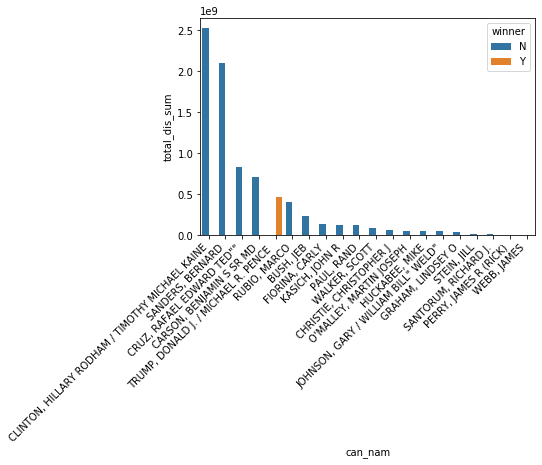

In [10]:
#check winner
ax = sns.barplot(x='can_nam', y = 'total_dis_sum', hue='winner', data=Amt_per_sta_ds)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)

**observation**
* first assumption did not hold, lets find if our data has the ability to give insight to why this is by analyzing the campaign duration and party affiliation

Text(0.5, 1.0, 'dominant party')

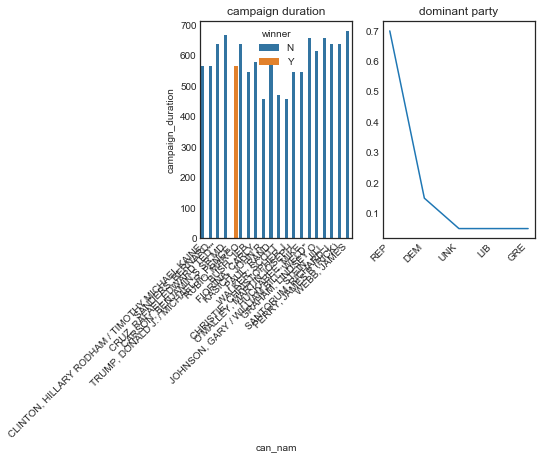

In [12]:
plt.style.use('seaborn-white')
plt.subplot(121)
ax = sns.barplot(x='can_nam', y='campaign_duration', hue='winner', data=Amt_per_sta_ds)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")


plt.subplot(122)
Amt_per_sta_ds['can_par_aff'].value_counts(normalize=True, sort=True).plot()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("dominant party")

Text(0.5, 1.0, 'campaign duration')

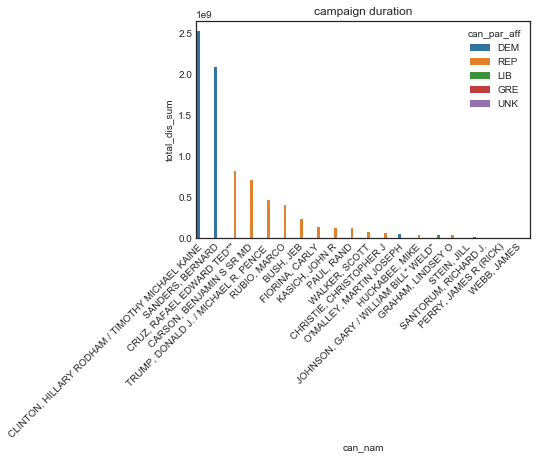

In [13]:
ax = sns.barplot(x='can_nam', y='total_dis_sum', hue='can_par_aff', data=Amt_per_sta_ds)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.title("campaign duration")

**Observation**
* MYSTERY SOLVED!!! Party affiliations solved the problem